# Analyzing the Conversion Rate of a Bank's Marketing Campaign
### EXPLORATORY ANALYSIS

Source - https://archive.ics.uci.edu/ml/datasets/bank+marketing

### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric) - Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


\

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


file_name = "data/bank-additional-full.csv"
bank = pd.read_csv(file_name, sep=',')


In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print ("Rows     : " , bank.shape[0])
print ("Columns  : " , bank.shape[1])
print ("\nFeatures : \n" ,bank.columns)
print ("\nMissing values :  ", bank.isnull().sum().values.sum())
print ("\nUnique values :  \n", bank.nunique())

Rows     :  41188
Columns  :  21

Features : 
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Missing values :   0

Unique values :  
 age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


#### Making our 'yes' and 'no' column for y (where 'y' indicates whether a customer was converted)
#### into a binary numeric datatype where '0' is 'no' and '1' is 'yes'

In [5]:
bank['converted'] = bank['y'].apply(lambda c:1  if c == 'yes' else 0)

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,converted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Getting some base statistics to better understand how much customers converted

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,converted
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


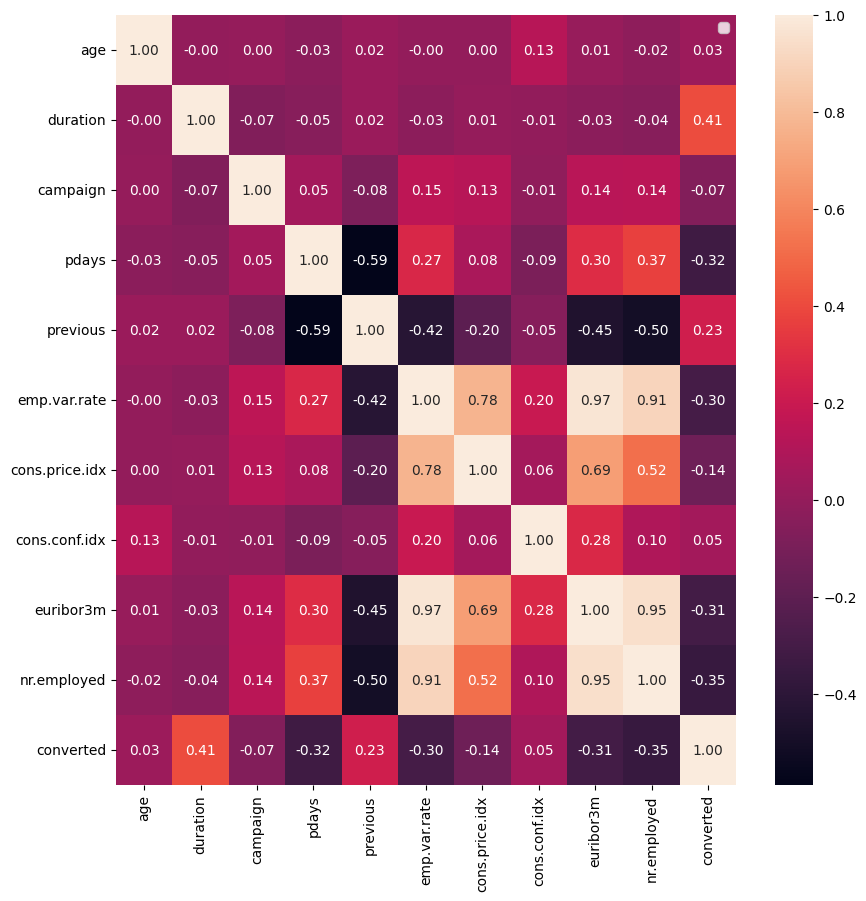

In [9]:
### Ploting the co-relation matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_corr(df,size=10):

    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    sns.heatmap(data=corr, annot=True, fmt=".2f")
    fig.show()
    
plot_corr(bank)

In [10]:
print('Total Converted: %i out of %i' % (bank.converted.sum(), bank.converted.count()))

Total Converted: 4640 out of 41188


In [11]:
print('Our Conversion Rate: %0.2f%%' % (bank.converted.sum() / bank.converted.count() * 100.0))

Our Conversion Rate: 11.27%


### Getting the sum of the number of conversions per month

<Axes: xlabel='month', ylabel='converted'>

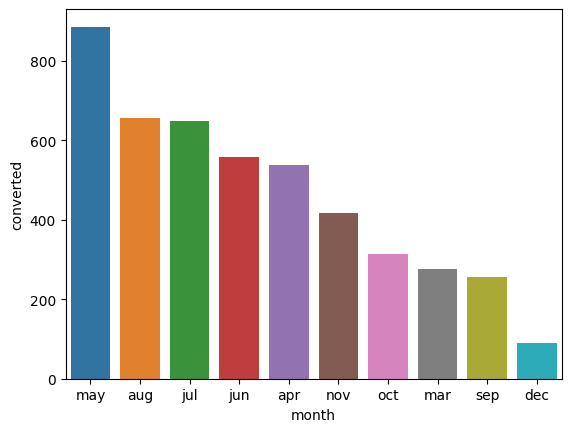

In [12]:
conversions_per_month = bank.groupby("month")['converted'].sum().to_frame().sort_values("converted", ascending=False)
sns.barplot(data=conversions_per_month.reset_index(), x='month', y='converted')

Observamos que en el mes de diciembre se obtienen menos conversiones. Esto puede estar relacionado con la época festiva (Navidad, Año Nuevo).Las personas pueden estar más ocupadas, distraídas o enfocadas en gastos relacionados con regalos y celebraciones.

### Getting the sum of the number of conversions per day of week

<Axes: xlabel='day_of_week', ylabel='converted'>

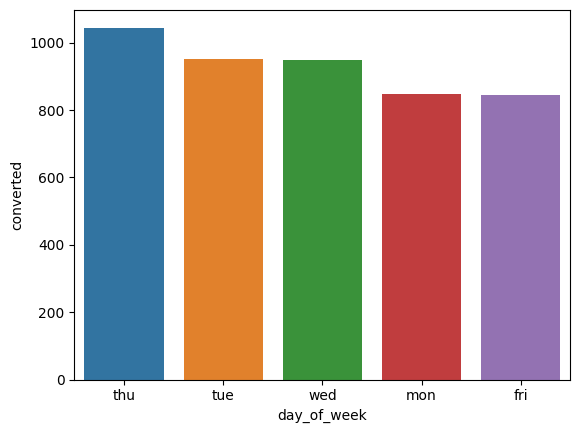

In [13]:
conversions_per_month = bank.groupby("day_of_week")['converted'].sum().to_frame().sort_values("converted", ascending=False)
sns.barplot(data=conversions_per_month.reset_index(), x='day_of_week', y='converted')

### Getting the sum of the number of conversions per campaign

In [14]:
pd.DataFrame(bank.groupby(by='campaign')['converted'].sum())

,converted
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


### Getting the total number of customers targeted per campaign

In [15]:
pd.DataFrame(bank.groupby(by='campaign')['converted'].count())

,converted
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


We observed that there is a big difference in the number of target customers per campaign, it would be better to obtain the conversion rate per campaign.

### Finding the conversion rate for each campaign

In [16]:
conv_by_camp = bank.groupby('campaign').agg(conversion_sum=('converted', 'sum'), conversion_count=('converted', 'count'))

conv_by_camp["conversion_rate"] = round(conv_by_camp["conversion_sum"]/conv_by_camp["conversion_count"]*100,2)
conv_by_camp.sort_values("conversion_rate", ascending=False, inplace=True)
conv_by_camp.reset_index(inplace=True)
conv_by_camp['campaign'] = conv_by_camp["campaign"].astype('object')

conv_by_camp

,campaign,conversion_sum,conversion_count,conversion_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,6,75,979,7.66
5,5,120,1599,7.50
6,17,4,58,6.90
7,11,12,177,6.78
8,23,1,16,6.25
9,7,38,629,6.04


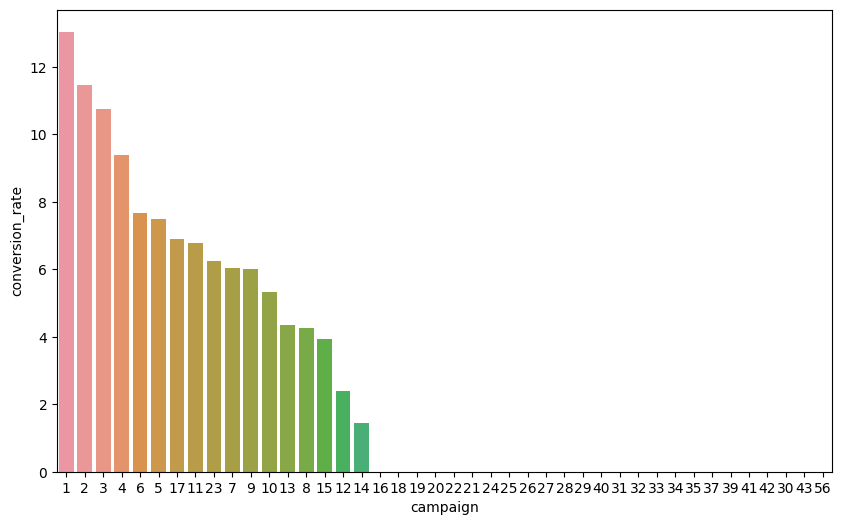

In [17]:
plt.figure(figsize=(10, 6)) 

# Utiliza el parámetro order para especificar el orden de las barras
sns.barplot(data=conv_by_camp, x="campaign", y="conversion_rate", order=conv_by_camp.sort_values('conversion_rate', ascending=False)['campaign'])

plt.show()

## Creating age groups for better interpretation of age

In [18]:
bank['age_group'] = bank['age'].apply(lambda x: '[17, 25)' if x < 25 else '[25, 35)' 
                                  if x < 35 else '[35, 45)'
                                  if x < 45 else '[45, 55)' 
                                  if x < 55 else '[55, 65)'
                                  if x < 65 else '65+')
bank["age_group"] = bank["age_group"].astype("object")

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,converted,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[35, 45)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[35, 45)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"


### Finding the conversion rate for age_group

In [19]:
conv_by_age_group = bank.groupby('age_group').agg(conversion_sum=('converted', 'sum'), conversion_count=('converted', 'count'))

conv_by_age_group["conversion_rate"] = round(conv_by_age_group["conversion_sum"]/conv_by_age_group["conversion_count"]*100,2)
conv_by_age_group.sort_values("conversion_rate", ascending=False, inplace=True)
conv_by_age_group.reset_index(inplace=True)

conv_by_age_group

,age_group,conversion_sum,conversion_count,conversion_rate
0,65+,313,663,47.21
1,"[17, 25)",256,1068,23.97
2,"[55, 65)",484,3567,13.57
3,"[25, 35)",1666,13686,12.17
4,"[35, 45)",1168,13500,8.65
5,"[45, 55)",753,8704,8.65


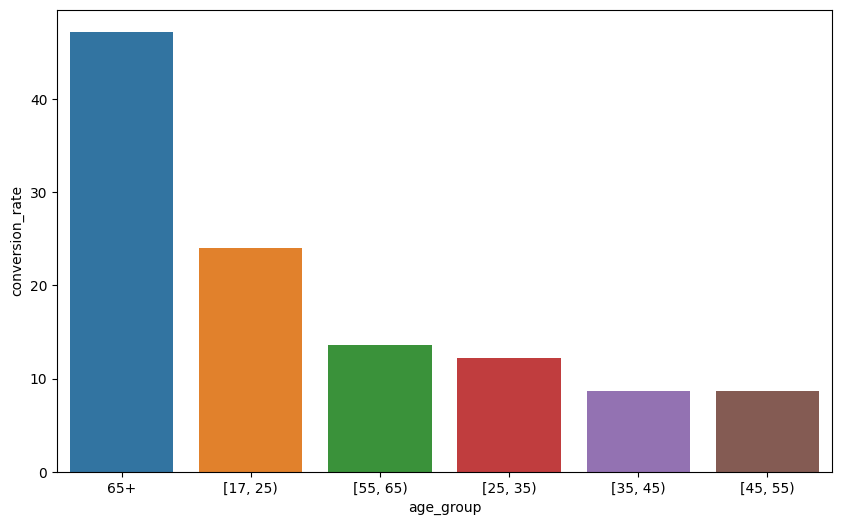

In [20]:
plt.figure(figsize=(10, 6)) 

sns.barplot(data=conv_by_age_group, x="age_group", y="conversion_rate")

plt.show()

People over 65 years of age have the highest acceptance rate followed by young people (17-25)

### Let's do the same for education

In [21]:
conv_by_education = bank.groupby('education').agg(conversion_sum=('converted', 'sum'), conversion_count=('converted', 'count'))

conv_by_education["conversion_rate"] = round(conv_by_education["conversion_sum"]/conv_by_education["conversion_count"]*100,2)
conv_by_education.sort_values("conversion_rate", ascending=False, inplace=True)
conv_by_education.reset_index(inplace=True)

conv_by_education

,education,conversion_sum,conversion_count,conversion_rate
0,illiterate,4,18,22.22
1,unknown,251,1731,14.50
2,university.degree,1670,12168,13.72
3,professional.course,595,5243,11.35
4,high.school,1031,9515,10.84
5,basic.4y,428,4176,10.25
6,basic.6y,188,2292,8.20
7,basic.9y,473,6045,7.82


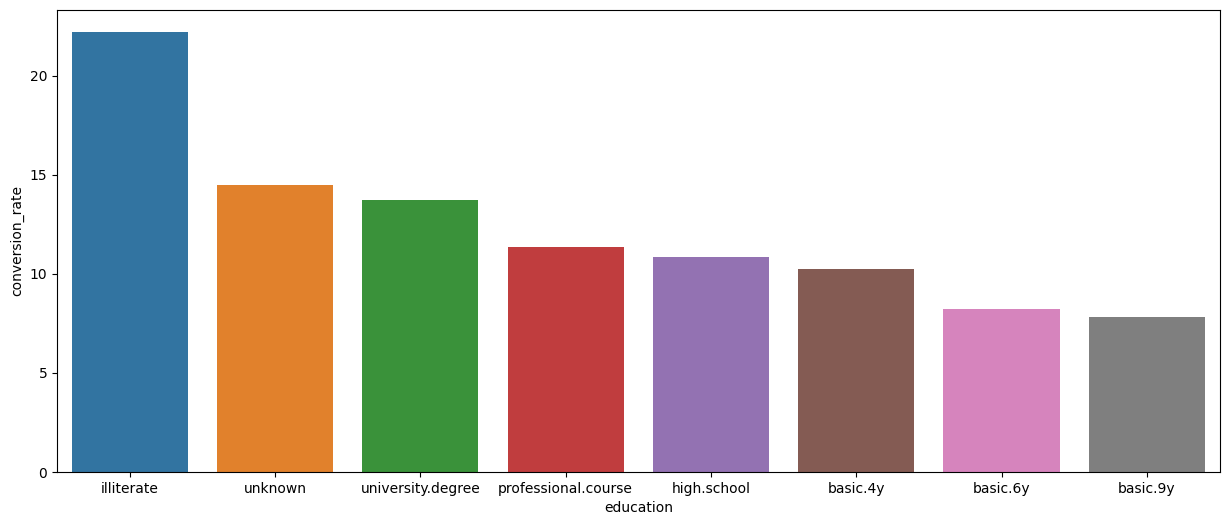

In [22]:
plt.figure(figsize=(15, 6)) 
sns.barplot(data=conv_by_education, x="education", y="conversion_rate")
plt.show()

### Let's explore Conversion Rate by Job

In [23]:
conv_by_job = bank.groupby('job').agg(conversion_sum=('converted', 'sum'), conversion_count=('converted', 'count'))

conv_by_job["conversion_rate"] = round(conv_by_job["conversion_sum"]/conv_by_job["conversion_count"]*100,2)
conv_by_job.sort_values("conversion_rate", ascending=False, inplace=True)
conv_by_job.reset_index(inplace=True)

conv_by_job

,job,conversion_sum,conversion_count,conversion_rate
0,student,275,875,31.43
1,retired,434,1720,25.23
2,unemployed,144,1014,14.20
3,admin.,1352,10422,12.97
4,management,328,2924,11.22
5,unknown,37,330,11.21
6,technician,730,6743,10.83
7,self-employed,149,1421,10.49
8,housemaid,106,1060,10.00
9,entrepreneur,124,1456,8.52


### Generating a Horizontal Bar Graph

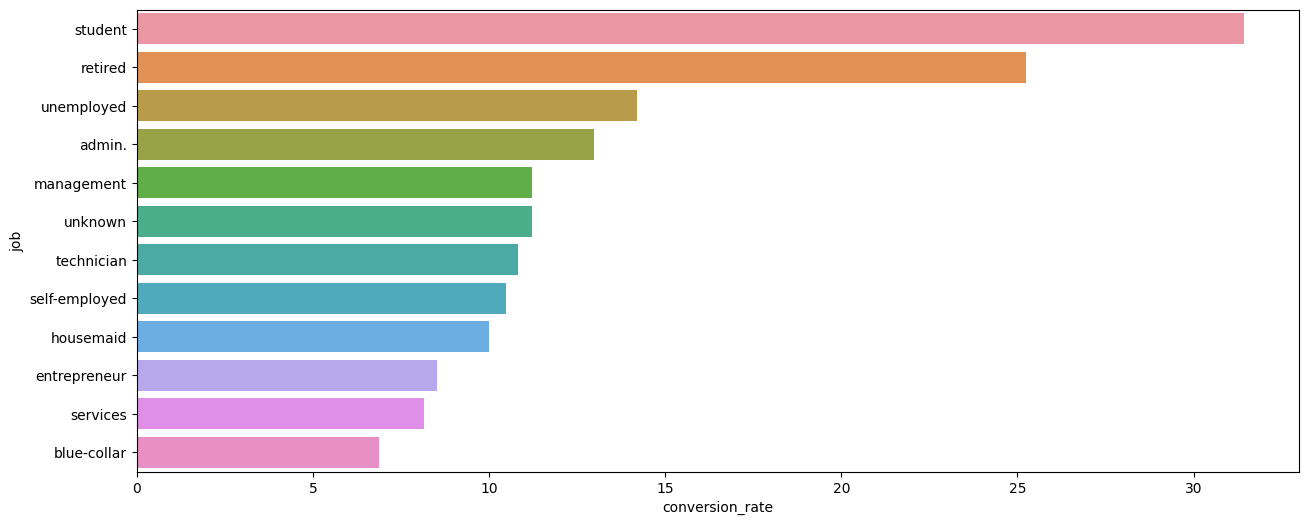

In [24]:
plt.figure(figsize=(15, 6)) 
sns.barplot(data=conv_by_job, x="conversion_rate", y="job")
plt.show()

We can see that students, retirees and the unemployed are the ones with the best conversion rate.

### Let's explore Conversion Rate By Marital Status

In [25]:
conv_by_ms = bank.groupby('marital').agg(conversion_sum=('converted', 'sum'), conversion_count=('converted', 'count'))

conv_by_ms["conversion_rate"] = round(conv_by_ms["conversion_sum"]/conv_by_ms["conversion_count"]*100,2)
conv_by_ms.sort_values("conversion_rate", ascending=False, inplace=True)
conv_by_ms.reset_index(inplace=True)

conv_by_ms

,marital,conversion_sum,conversion_count,conversion_rate
0,unknown,12,80,15.00
1,single,1620,11568,14.00
2,divorced,476,4612,10.32
3,married,2532,24928,10.16


### Let's generate a simple bar plot

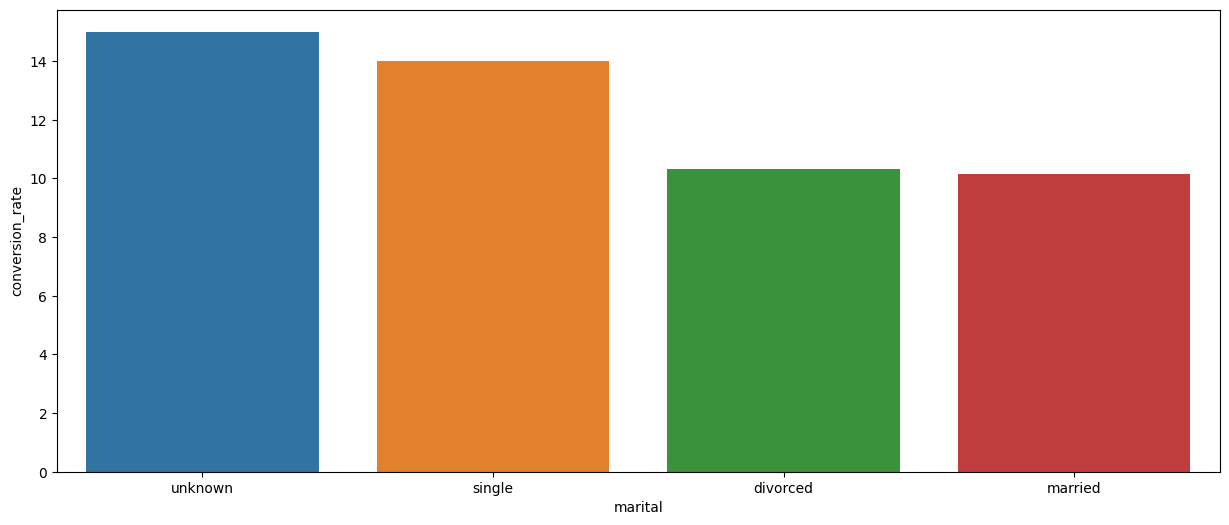

In [26]:
plt.figure(figsize=(15, 6)) 
sns.barplot(data=conv_by_ms, x="marital", y="conversion_rate")
plt.show()

In [27]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'converted',
       'age_group'],
      dtype='object')

In [28]:
conv_by_job_edad = bank.groupby(['job','age_group']).agg(conversion_sum=('converted', 'sum'), conversion_count=('converted', 'count'))

conv_by_job_edad["conversion_rate"] = round(conv_by_job_edad["conversion_sum"]/conv_by_job_edad["conversion_count"]*100,2)
conv_by_job_edad.sort_values("conversion_rate", ascending=False, inplace=True)
conv_by_job_edad.reset_index(inplace=True)

conv_by_job_edad

,job,age_group,conversion_sum,conversion_count,conversion_rate
0,unknown,"[17, 25)",4,6,66.67
1,management,65+,9,14,64.29
2,unknown,65+,7,11,63.64
3,entrepreneur,65+,2,4,50.00
4,student,"[45, 55)",2,4,50.00
...,...,...,...,...,...
65,unknown,"[45, 55)",4,107,3.74
66,services,65+,0,1,0.00
67,retired,"[17, 25)",0,1,0.00
68,housemaid,"[17, 25)",0,5,0.00


In [29]:
conv_by_job_edad = conv_by_job_edad[['job', 'age_group', 'conversion_rate']].pivot_table(index='job', values='conversion_rate', columns='age_group')
conv_by_job_edad.fillna(0, inplace=True)
conv_by_job_edad

age_group,65+,"[17, 25)","[25, 35)","[35, 45)","[45, 55)","[55, 65)"
job,,,,,,
admin.,47.06,20.38,14.32,10.49,12.17,17.06
blue-collar,40.00,9.84,8.19,5.70,6.61,7.59
entrepreneur,50.00,8.33,8.71,8.78,7.00,10.07
housemaid,47.37,0.00,7.19,4.82,9.94,14.77
management,64.29,18.52,11.19,11.16,9.23,13.41
retired,47.14,0.00,12.50,6.00,7.14,17.10
self-employed,0.00,33.33,12.18,11.02,6.82,9.82
services,0.00,12.66,9.63,7.72,5.80,5.47
student,0.00,37.83,27.94,15.00,50.00,0.00


Text(0.5, 1.0, 'Rate coversion job vs age_group')

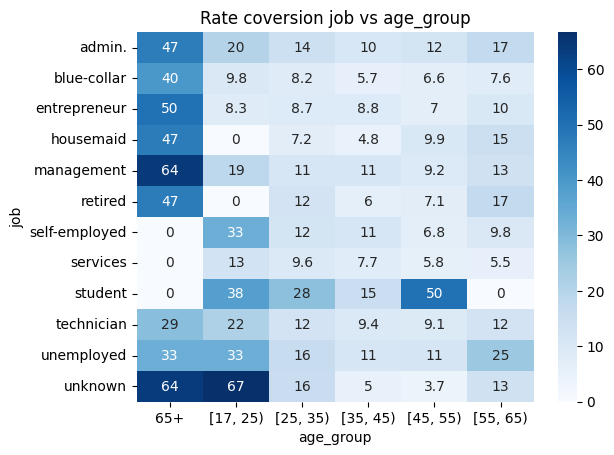

In [30]:
sns.heatmap(conv_by_job_edad, annot=True, cmap='Blues')
plt.title("Rate coversion job vs age_group")